#**"Optimasi Model Prediksi Churn: Perbandingan Random Forest dan XGBoost untuk Strategi Retensi Pelanggan di Bank Digital"**

# Introduction

Here are some analysis:
- Customer ID: Pengenal unik untuk setiap pelanggan.
- Surname: Nama keluarga atau nama belakang pelanggan.
- Credit Score: Nilai numerik yang mewakili skor kredit pelanggan.
- Geography: Negara tempat pelanggan tinggal (Prancis, Spanyol, atau Jerman).
- Gender: Jenis kelamin pelanggan (Pria atau Wanita).
- Age: Usia pelanggan.
- Tenure: Jumlah tahun pelanggan telah menjadi nasabah bank.
- Balance: Saldo rekening pelanggan.
- NumOfProducts: Jumlah produk bank yang digunakan pelanggan (misalnya,
rekening tabungan, kartu kredit).
- HasCrCard: Apakah pelanggan memiliki kartu kredit (1 = ya, 0 = tidak).
- IsActiveMember: Apakah pelanggan adalah anggota aktif (1 = ya, 0 = tidak).
- EstimatedSalary: Perkiraan gaji pelanggan.
- Exited: Apakah pelanggan telah berhenti berlangganan (1 = ya, 0 = tidak).

# Install & Load Library

In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042899 sha256=12074d9f866e33830288bf519da86acbe80b5da1f2254e1213e94b96f9651173
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=be2830593f547ee9a13b40ed5d72e3d5f5f34e2c81db584bad7aff439b448d66
  Stored in dire

In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# load Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
# load Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

# load xgboost classifier model
from xgboost import XGBClassifier

# Load DALEX untuk interpretability
import dalex as dx

# load scikitplot untuk visualisasi metrik
# import scikitplot as skplt

%matplotlib inline

# Load Dataset

In [ ]:
# load dataset ke raw_data
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/refs/heads/main/dataset/bank_churn_dataset_2/Churn_Modelling.csv")

In [ ]:
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Proses EDA Dataset

Check The Structure Of The Dataset

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Check Missing Values
raw_data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


kualitasa data bagus

In [ ]:
# Statistik deskriptif untuk variabel numerik
raw_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Cek jumlah nilai unik pada kolom kategori
print(raw_data['Geography'].value_counts())
print(raw_data['Gender'].value_counts())
print(raw_data['NumOfProducts'].value_counts())


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


# Visualisasi Data

1. Visualisasi Tingkat Churn Berdasarkan Gender dan Geografi

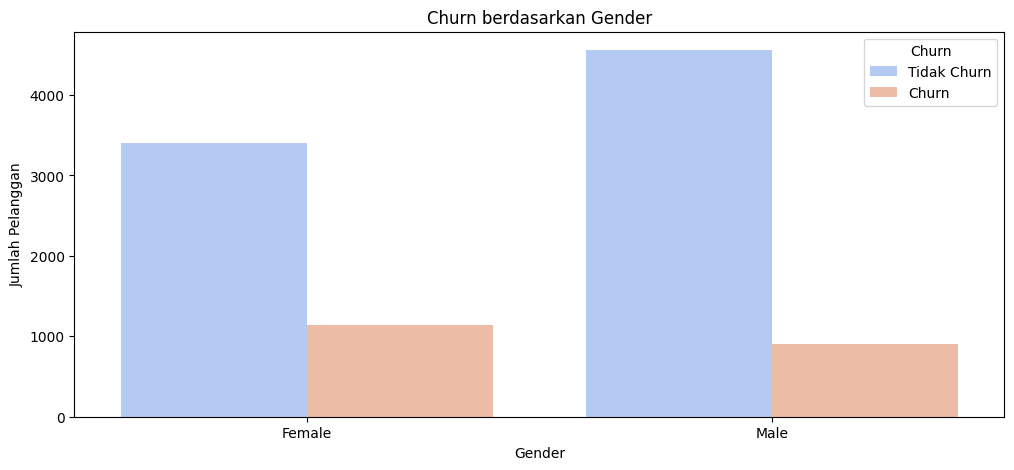

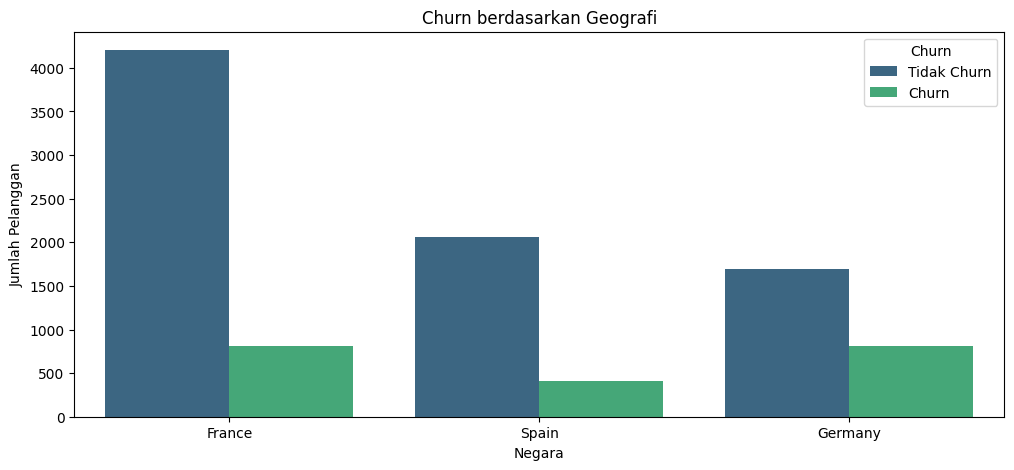

In [ ]:
# Pastikan dataset tidak memiliki nilai NaN
raw_data = raw_data.dropna(subset=["Geography", "Gender", "Exited"])

plt.figure(figsize=(12, 5))
sns.countplot(data=raw_data, x=raw_data["Gender"], hue=raw_data["Exited"], palette="coolwarm")
plt.title("Churn berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Churn", labels=["Tidak Churn", "Churn"])
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=raw_data, x=raw_data["Geography"], hue=raw_data["Exited"], palette="viridis")
plt.title("Churn berdasarkan Geografi")
plt.xlabel("Negara")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Churn", labels=["Tidak Churn", "Churn"])
plt.show()


2. Hubungan Churn dengan Variabel Numerik

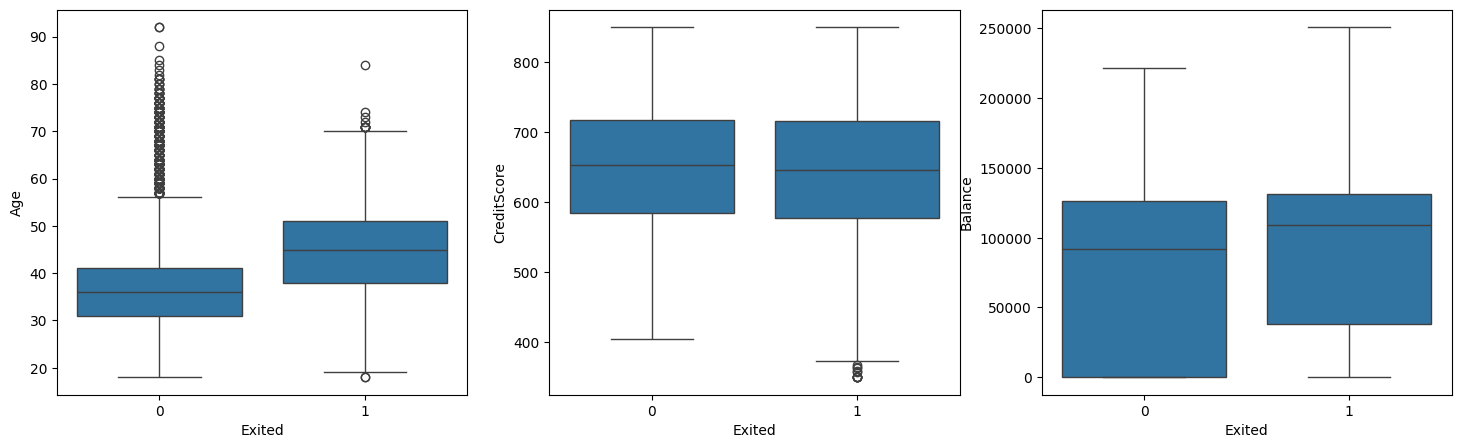

In [ ]:
# Boxplot untuk melihat distribusi Age, Credit Score, dan Balance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=raw_data, x="Exited", y="Age", ax=axes[0])
sns.boxplot(data=raw_data, x="Exited", y="CreditScore", ax=axes[1])
sns.boxplot(data=raw_data, x="Exited", y="Balance", ax=axes[2])
plt.show()

3. Distribusi NumOfProducts dan Tenure

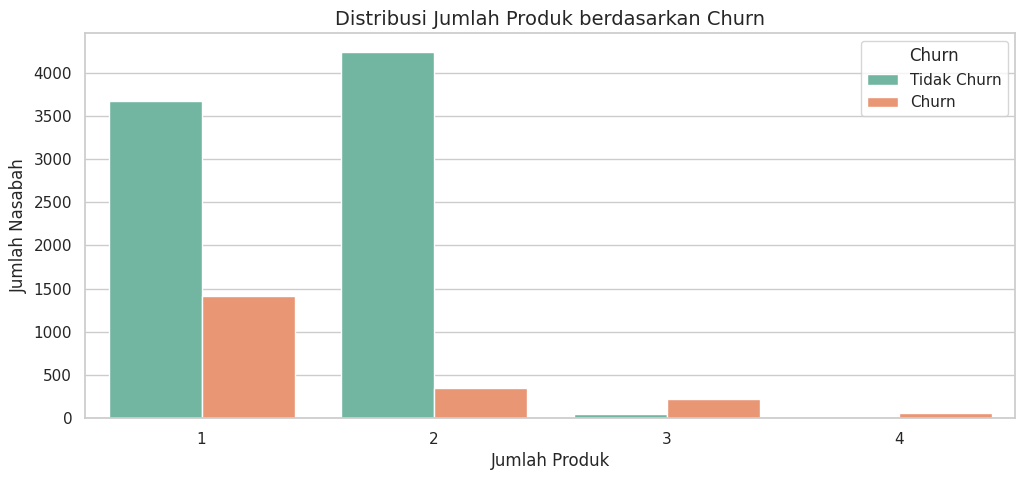

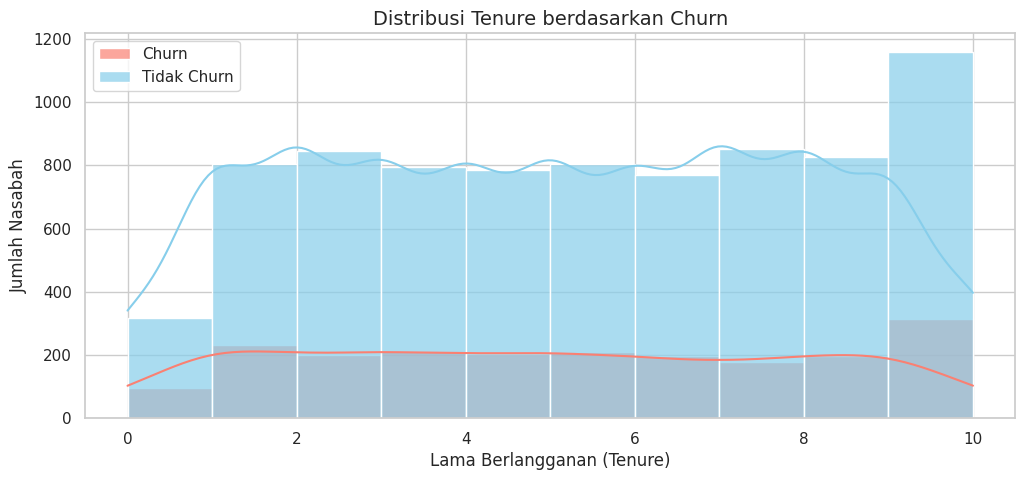

In [ ]:
# Set theme untuk visualisasi yang lebih menarik
sns.set_theme(style="whitegrid")

# Plot 1: Distribusi Jumlah Produk berdasarkan Churn
plt.figure(figsize=(12, 5))
sns.countplot(data=raw_data, x="NumOfProducts", hue="Exited", palette="Set2")
plt.title("Distribusi Jumlah Produk berdasarkan Churn", fontsize=14)
plt.xlabel("Jumlah Produk")
plt.ylabel("Jumlah Nasabah")
plt.legend(title="Churn", labels=["Tidak Churn", "Churn"])
plt.show()

# Plot 2: Distribusi Tenure berdasarkan Churn
plt.figure(figsize=(12, 5))
sns.histplot(raw_data[raw_data["Exited"] == 1]["Tenure"], bins=10, kde=True, color="salmon", label="Churn", alpha=0.7)
sns.histplot(raw_data[raw_data["Exited"] == 0]["Tenure"], bins=10, kde=True, color="skyblue", label="Tidak Churn", alpha=0.7)
plt.title("Distribusi Tenure berdasarkan Churn", fontsize=14)
plt.xlabel("Lama Berlangganan (Tenure)")
plt.ylabel("Jumlah Nasabah")
plt.legend()
plt.show()


Berdasarkan hasil visualisasi yang telah dilakukan, berikut adalah insight dan rekomendasi yang dapat digunakan untuk pemodelan machine learning:

### **Insight dari Visualisasi**
1. **Churn berdasarkan Gender**  
   - Laki-laki memiliki jumlah churn lebih rendah dibanding perempuan.  
   - Namun, jumlah pelanggan laki-laki yang tidak churn lebih banyak dibanding perempuan.  
   - Bisa menjadi indikator bahwa gender memiliki pengaruh terhadap churn.

2. **Churn berdasarkan Geografi**  
   - Pelanggan dari Prancis lebih banyak dibandingkan dengan Jerman dan Spanyol.  
   - Tingkat churn di Jerman tampaknya lebih tinggi dibanding dua negara lainnya.  
   - Hal ini mengindikasikan bahwa lokasi geografis pelanggan dapat menjadi variabel penting dalam prediksi churn.

3. **Analisis Boxplot pada Age, CreditScore, dan Balance**  
   - **Age:** Pelanggan yang churn cenderung lebih tua dibandingkan yang tidak churn.  
   - **Credit Score:** Tidak menunjukkan perbedaan yang signifikan antara pelanggan churn dan tidak churn.  
   - **Balance:** Banyak pelanggan dengan balance tinggi tetap bertahan sebagai pelanggan.

4. **Distribusi Jumlah Produk dan Tenure terhadap Churn**  
   - **NumOfProducts:**  
     - Pelanggan dengan 1 atau 2 produk memiliki tingkat churn lebih tinggi.  
     - Pelanggan dengan lebih dari 2 produk jarang melakukan churn.  
   - **Tenure:**  
     - Pelanggan dengan tenure lebih pendek (< 2 tahun) cenderung lebih banyak melakukan churn.
     - Namun, pelanggan dengan tenure sangat lama (10 tahun) juga memiliki tingkat churn tinggi.

---

### **Rekomendasi untuk Model Machine Learning**
1. **Feature Engineering**
   - **Gabungan Age dan IsActiveMember:**  
     - Bisa dibuat kategori seperti *Young Active*, *Young Inactive*, *Old Active*, dan *Old Inactive* untuk melihat korelasi yang lebih jelas.
   - **Encoding Geography dan Gender:**  
     - Bisa menggunakan one-hot encoding atau ordinal encoding agar model dapat memahaminya.
   - **Transformasi NumOfProducts:**  
     - Karena pelanggan dengan 1-2 produk lebih cenderung churn, bisa dibuat fitur biner: "Low Product User" vs. "High Product User."
   - **Balance Scaling:**  
     - Jika diperlukan, normalisasi dapat membantu agar model lebih sensitif terhadap skala data.

2. **Feature Selection**  
   - Berdasarkan insight, fitur yang paling berpengaruh terhadap churn kemungkinan adalah **Age, Geography, NumOfProducts, dan IsActiveMember.**  
   - **CreditScore** tidak menunjukkan pola signifikan, jadi bisa diuji apakah memberikan kontribusi atau tidak ke model..



# Rekayasa Fitur

Encoding Kategori (Geography & Gender)

In [ ]:
# One-Hot Encoding Geography
raw_data = pd.get_dummies(raw_data, columns=['Geography'], drop_first=True)

# Binary Encoding Gender
raw_data['Gender'] = raw_data['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
raw_data.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
4070,4071,15611551,Hill,676,1,48,1,131659.59,2,0,1,14152.15,0,False,True
6866,6867,15664506,Goodwin,675,1,32,8,197436.82,1,1,1,52710.70,0,False,True
6409,6410,15690695,Flynn,683,0,33,9,0.00,2,1,1,38784.42,0,False,False


In [ ]:
print(raw_data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')


Dalam **One-Hot Encoding**, ketika kita menggunakan `drop_first=True`, salah satu kategori dalam fitur kategori akan **dihapus secara otomatis** untuk **menghindari dummy variable trap**.  

### **Kesimpulan**  
✅ **France dijadikan baseline (referensi), bukan hilang**  
✅ **Jika Geography_Germany = 0 & Geography_Spain = 0 → berarti pelanggan dari France**  
✅ **`drop_first=True` adalah best practice untuk menghindari dummy variable trap**  

Kamu bisa lanjut ke tahap modeling tanpa masalah! 🚀😊

**Membuat Fitur Baru: "Age_IsActive"**

Dari analisis sebelumnya, kombinasi Age dan IsActiveMember bisa menjadi faktor penting dalam churn. Kita bisa membuat fitur baru yang mencerminkan interaksi antara usia dan status keanggotaan aktif.

In [ ]:
# Membuat kolom 'Age_Group'
def categorize_age(age):
    if age < 35:
        return "Young"
    elif 35 <= age <= 55:
        return "Middle"
    else:
        return "Old"

raw_data["Age_Group"] = raw_data["Age"].apply(categorize_age)

# Membuat fitur Age_IsActive
raw_data["Age_IsActive_Young_1"] = (raw_data["Age_Group"] == "Young") & (raw_data["IsActiveMember"] == 1)
raw_data["Age_IsActive_Young_0"] = (raw_data["Age_Group"] == "Young") & (raw_data["IsActiveMember"] == 0)
raw_data["Age_IsActive_Middle_1"] = (raw_data["Age_Group"] == "Middle") & (raw_data["IsActiveMember"] == 1)
raw_data["Age_IsActive_Old_1"] = (raw_data["Age_Group"] == "Old") & (raw_data["IsActiveMember"] == 1)
raw_data["Age_IsActive_Old_0"] = (raw_data["Age_Group"] == "Old") & (raw_data["IsActiveMember"] == 0)


In [ ]:
# Mengatur agar semua kolom ditampilkan
pd.set_option('display.max_columns', None)

raw_data.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Age_Group,Age_IsActive_Young_1,Age_IsActive_Young_0,Age_IsActive_Middle_1,Age_IsActive_Old_1,Age_IsActive_Old_0
9680,9681,15655335,Becher,590,1,36,1,0.00,2,1,0,48876.84,0,False,False,Middle,False,False,False,False,False
5936,5937,15773723,Duncan,588,0,22,9,67178.19,1,1,1,163534.75,1,False,True,Young,True,False,False,False,False
6759,6760,15660878,T'ien,705,1,92,1,126076.24,2,1,1,34436.83,0,False,False,Old,False,False,False,True,False


**Membuat Variabel Baru Age_IsActive**

Kita membuat beberapa fitur biner berdasarkan kombinasi kelompok usia dan status aktif pelanggan:

- Age_IsActive_Young_1 → Pelanggan muda yang aktif (Young & Active)
- Age_IsActive_Young_0 → Pelanggan muda yang tidak aktif (Young & Inactive)
- Age_IsActive_Middle_1 → Pelanggan dewasa yang aktif (Middle & Active)
- Age_IsActive_Old_1 → Pelanggan tua yang aktif (Old & Active)
- Age_IsActive_Old_0 → Pelanggan tua yang tidak aktif (Old & Inactive)

# Pemrosesan Awal Data untuk Machine Learning

In [ ]:
# Cek jumlah missing values di setiap kolom
print(raw_data.isnull().sum())


RowNumber                0
CustomerId               0
Surname                  0
CreditScore              0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
Geography_Germany        0
Geography_Spain          0
Age_Group                0
Age_IsActive_Young_1     0
Age_IsActive_Young_0     0
Age_IsActive_Middle_1    0
Age_IsActive_Old_1       0
Age_IsActive_Old_0       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding untuk kategori tanpa urutan
raw_data = pd.get_dummies(raw_data, columns=["Gender", "Geography_Germany", "Geography_Spain"], drop_first=True)

# Label Encoding untuk kategori dengan urutan (Age_Group)
age_group_mapping = {"Young": 0, "Middle": 1, "Old": 2}
raw_data["Age_Group"] = raw_data["Age_Group"].map(age_group_mapping)


Skala atau Normalisasi Fitur Numerik

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik yang perlu di-scale
num_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan scaling
raw_data[num_features] = scaler.fit_transform(raw_data[num_features])


In [ ]:
raw_data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Age_IsActive_Young_1,Age_IsActive_Young_0,Age_IsActive_Middle_1,Age_IsActive_Old_1,Age_IsActive_Old_0,Gender_1,Geography_Germany_True,Geography_Spain_True
7825,7826,15802758,Chinwendu,-0.584891,-1.518201,-0.350204,0.453054,0.807737,1,0,-0.753530,1,0,False,True,False,False,False,False,True,False
1011,1012,15698442,Eberechukwu,0.708456,-0.373958,-0.695982,0.744924,-0.911583,1,1,0.663242,0,1,False,False,True,False,False,True,False,True
348,349,15735203,Seleznyov,0.035916,-0.660018,-1.387538,0.609430,-0.911583,1,1,0.453035,0,0,True,False,False,False,False,False,True,False
2068,2069,15629338,Collingridge de Tourcey,0.077303,-0.755372,-1.041760,-0.639785,-0.911583,1,0,0.061813,1,0,False,True,False,False,False,False,False,True
936,937,15613630,Tang,1.287876,1.247053,1.032908,0.535894,-0.911583,1,1,-0.056808,1,1,False,False,True,False,False,True,False,False


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RowNumber               10000 non-null  int64  
 1   CustomerId              10000 non-null  int64  
 2   Surname                 10000 non-null  object 
 3   CreditScore             10000 non-null  float64
 4   Age                     10000 non-null  float64
 5   Tenure                  10000 non-null  float64
 6   Balance                 10000 non-null  float64
 7   NumOfProducts           10000 non-null  float64
 8   HasCrCard               10000 non-null  int64  
 9   IsActiveMember          10000 non-null  int64  
 10  EstimatedSalary         10000 non-null  float64
 11  Exited                  10000 non-null  int64  
 12  Age_Group               10000 non-null  int64  
 13  Age_IsActive_Young_1    10000 non-null  bool   
 14  Age_IsActive_Young_0    10000 non-null 

Redundant Features (Drop Kolom yang Tidak Perlu)

In [ ]:
raw_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


Kesimpulan: Perlu menghapus fitur yang tidak relevan untuk meningkatkan performa model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
raw_data[num_features] = scaler.fit_transform(raw_data[num_features])


In [ ]:
raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Age_IsActive_Young_1,Age_IsActive_Young_0,Age_IsActive_Middle_1,Age_IsActive_Old_1,Age_IsActive_Old_0,Gender_1,Geography_Germany_True,Geography_Spain_True
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,False,False,True,False,False,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,1,False,False,True,False,False,False,False,True
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,False,False,False,False,False,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,False,False,False,False,False,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1,False,False,True,False,False,False,False,True


# Train-Test Split Data

Menggunakan Semua Fitur

- Keuntungan: Model memiliki lebih banyak informasi.
- Kekurangan: Bisa terjadi overfitting jika ada fitur yang tidak relevan.

In [ ]:
X = raw_data.drop(columns=['Exited'])  # Semua fitur kecuali target
y = raw_data['Exited']  # Target variabel


In [ ]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

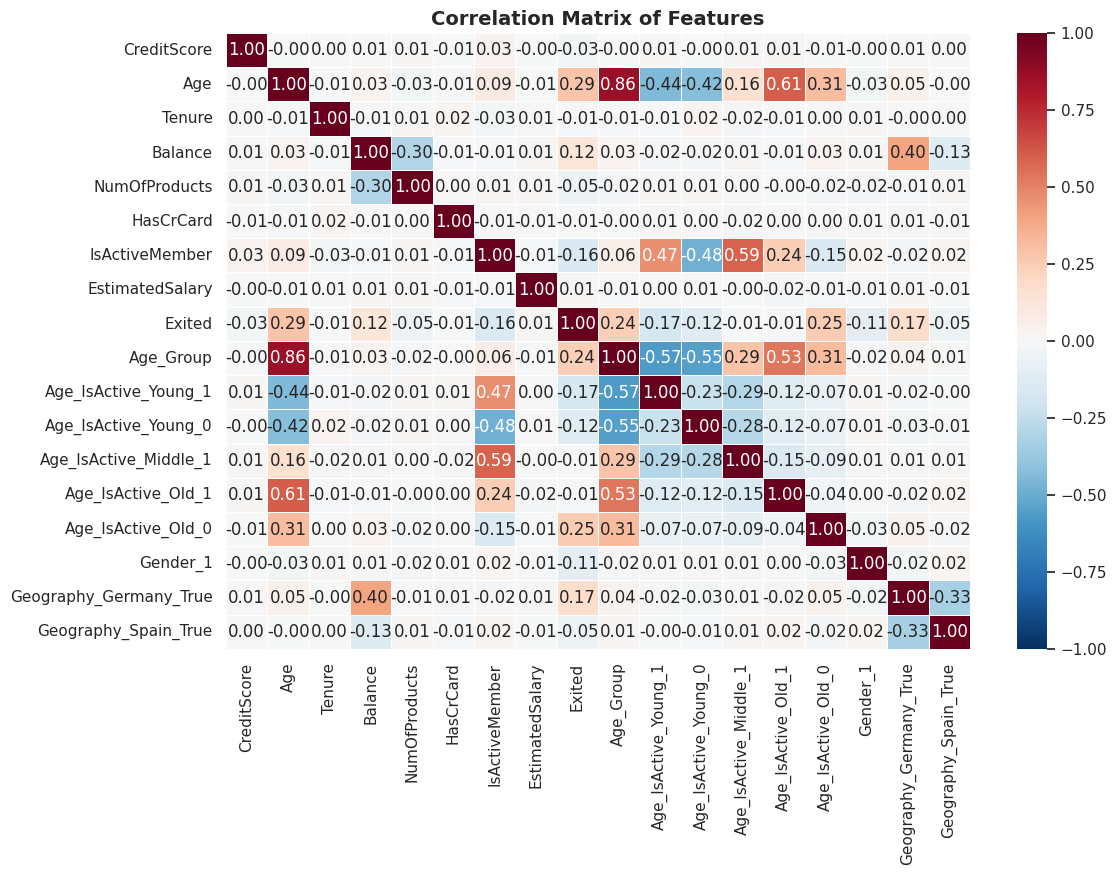

In [ ]:
# Hitung korelasi
corr_matrix = raw_data.corr()

# Atur ukuran plot dan style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Visualisasi heatmap
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, center=0)

# Tambahkan judul
plt.title("Correlation Matrix of Features", fontsize=14, fontweight='bold')

# Tampilkan plot
plt.show()


In [ ]:
# Hitung korelasi semua fitur terhadap target Exited
correlation = raw_data.corr()['Exited'].drop('Exited')

# Pilih fitur dengan korelasi absolut >= 0.05
selected_features = correlation[abs(correlation) >= 0.05].index

# Buat dataset baru hanya dengan fitur yang relevan
X_selected = raw_data[selected_features]

# Tampilkan fitur yang dipilih
print("Fitur yang dipilih berdasarkan korelasi ≥ 0.05:\n", selected_features)


Fitur yang dipilih berdasarkan korelasi ≥ 0.05:
 Index(['Age', 'Balance', 'IsActiveMember', 'Age_Group', 'Age_IsActive_Young_1',
       'Age_IsActive_Young_0', 'Age_IsActive_Old_0', 'Gender_1',
       'Geography_Germany_True', 'Geography_Spain_True'],
      dtype='object')


In [ ]:
raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Age_IsActive_Young_1,Age_IsActive_Young_0,Age_IsActive_Middle_1,Age_IsActive_Old_1,Age_IsActive_Old_0,Gender_1,Geography_Germany_True,Geography_Spain_True
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,False,False,True,False,False,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,1,False,False,True,False,False,False,False,True
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,False,False,False,False,False,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,False,False,False,False,False,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1,False,False,True,False,False,False,False,True


# Analisis Korelasi dan Visualisasi Fitur yang Berpengaruh terhadap Churn

Numerical Data vs Churn

<ipython-input-30-5a73a4094652>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y=feature, data=raw_data, palette="coolwarm")
<ipython-input-30-5a73a4094652>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y=feature, data=raw_data, palette="coolwarm")
<ipython-input-30-5a73a4094652>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y=feature, data=raw_data, palette="coolwarm")


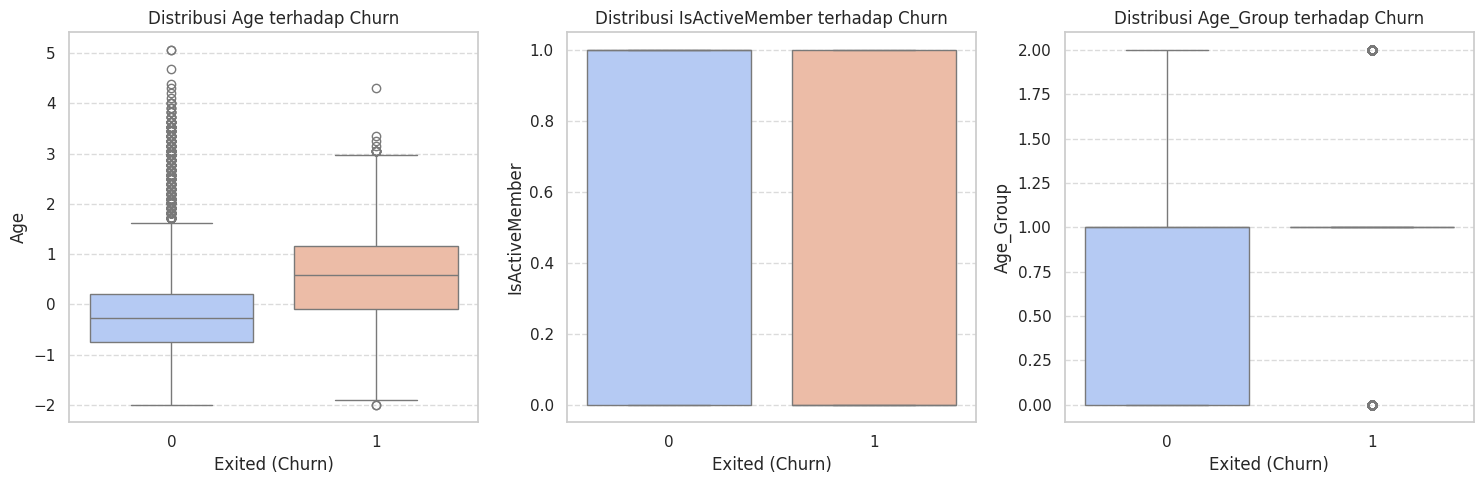

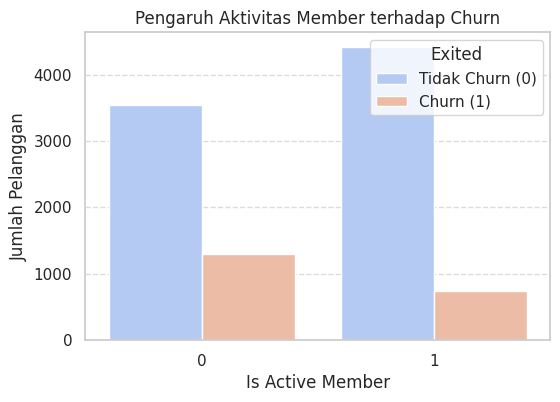

In [ ]:
# Pilih fitur dengan korelasi signifikan
selected_features = ["Age", "IsActiveMember", "Age_Group"]

plt.figure(figsize=(15, 5))

# Visualisasi dengan Boxplot
for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Exited", y=feature, data=raw_data, palette="coolwarm")
    plt.title(f"Distribusi {feature} terhadap Churn", fontsize=12)
    plt.xlabel("Exited (Churn)")
    plt.ylabel(feature)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Visualisasi Distribusi untuk IsActiveMember
plt.figure(figsize=(6, 4))
sns.countplot(x="IsActiveMember", hue="Exited", data=raw_data, palette="coolwarm")
plt.title("Pengaruh Aktivitas Member terhadap Churn", fontsize=12)
plt.xlabel("Is Active Member")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Exited", labels=["Tidak Churn (0)", "Churn (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Berdasarkan visualisasi yang ditampilkan:

1. **Distribusi Age terhadap Churn**  
   - Pelanggan yang churn (1) cenderung memiliki median usia yang sedikit lebih tinggi dibandingkan yang tidak churn (0).
   - Terdapat outlier pada kedua kelompok, terutama pelanggan muda dengan usia ekstrem.

2. **Distribusi IsActiveMember terhadap Churn**  
   - Distribusi keanggotaan aktif (IsActiveMember) terlihat cukup seimbang antara yang churn dan tidak churn.
   - Status aktif tampaknya bukan faktor penentu utama apakah pelanggan akan churn atau tidak.

3. **Distribusi Age_Group terhadap Churn**  
   - Kelompok usia tertentu memiliki kecenderungan churn lebih tinggi, terlihat dari distribusi kelompok umur.
   
4. **Pengaruh Aktivitas Member terhadap Churn**  
   - Pelanggan yang tidak aktif memiliki jumlah churn yang lebih tinggi dibandingkan pelanggan aktif.
   - Meski jumlah pelanggan aktif lebih banyak, proporsi churn di kedua kelompok terlihat cukup signifikan.

👉 **Kesimpulan Awal:**  
- Usia memiliki sedikit pengaruh terhadap churn, dengan pelanggan yang lebih tua cenderung lebih rentan untuk churn.  
- Keanggotaan aktif tidak secara langsung memengaruhi churn, namun pelanggan tidak aktif memiliki risiko churn yang lebih tinggi.  

Heatmap Churn Rate Berdasarkan Usia dan Status Keaktifan

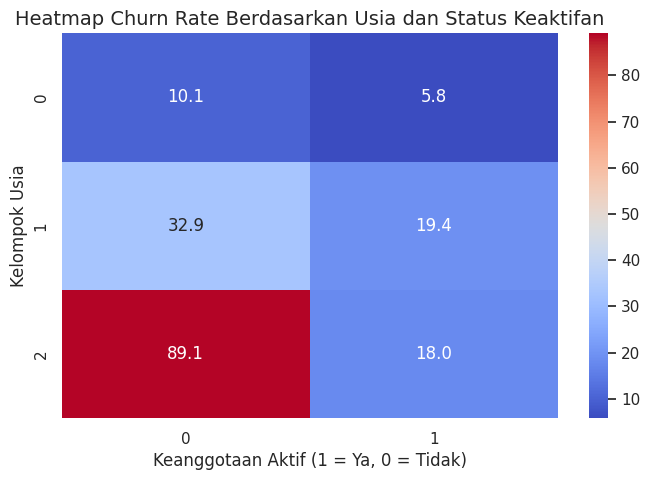

In [ ]:
# Buat pivot table untuk heatmap
heatmap_data = raw_data.pivot_table(index="Age_Group", columns="IsActiveMember", values="Exited", aggfunc="mean") * 100

# Visualisasi Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Heatmap Churn Rate Berdasarkan Usia dan Status Keaktifan", fontsize=14)
plt.xlabel("Keanggotaan Aktif (1 = Ya, 0 = Tidak)", fontsize=12)
plt.ylabel("Kelompok Usia", fontsize=12)

plt.show()

Perbandingan Churn Rate Antara Member Aktif dan Tidak Aktif

<ipython-input-32-d459ef4df217>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_churn.index, y=active_churn.values, palette="coolwarm")


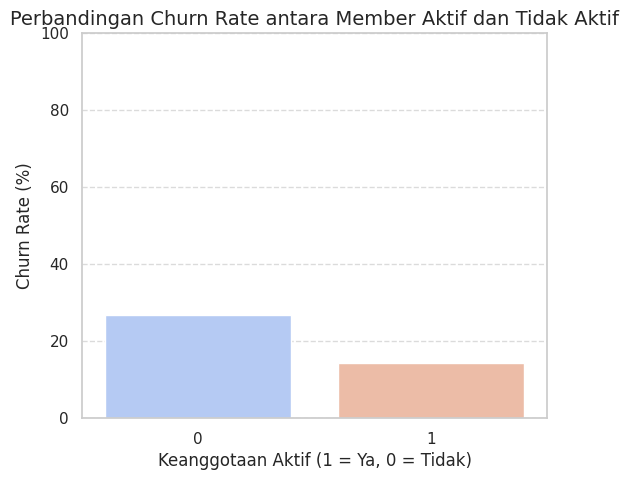

In [ ]:
# Hitung churn rate berdasarkan status keanggotaan
active_churn = raw_data.groupby("IsActiveMember")["Exited"].mean() * 100

# Visualisasi
plt.figure(figsize=(6, 5))
sns.barplot(x=active_churn.index, y=active_churn.values, palette="coolwarm")
plt.title("Perbandingan Churn Rate antara Member Aktif dan Tidak Aktif", fontsize=14)
plt.xlabel("Keanggotaan Aktif (1 = Ya, 0 = Tidak)", fontsize=12)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


**Insight dari Visualisasi Churn Rate:**

1. Hubungan Usia, Keaktifan, dan Churn (Heatmap):

- Kelompok usia tertua (2) memiliki churn rate tertinggi hingga 89.1% jika mereka tidak aktif (IsActiveMember = 0).
Namun, meskipun aktif (IsActiveMember = 1), churn rate mereka tetap cukup tinggi di 18.0%.
- Usia menengah (1) juga menunjukkan tren serupa, dengan churn rate 32.9% (tidak aktif) dan 19.4% (aktif).
- Usia muda (0) memiliki churn rate paling rendah, baik aktif maupun tidak aktif (10.1% dan 5.8%).
2.Churn Rate berdasarkan Keaktifan Member (Barplot):

- Pelanggan yang tidak aktif memiliki churn rate dua kali lipat lebih tinggi dibandingkan yang aktif.
Churn rate tidak aktif = 25%
Churn rate aktif = 12%

# Modeling


- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
-  XGBoost

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Exited,
0,0.7945
1,0.2055


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model dengan class_weight yang diperbaiki
knn_clf = KNeighborsClassifier(n_neighbors=5)  # KNN tidak mendukung class_weight

dc_clf = DecisionTreeClassifier(
    max_depth=5,
    ccp_alpha=0.001,
    class_weight="balanced"  # Hitung otomatis berdasarkan distribusi data
)

rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight="balanced"
)

svm_clf = SVC(
    random_state=1000,
    probability=True,
    class_weight="balanced"
)

xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    scale_pos_weight= (1 - 0.2055) / 0.2055  # Rasio kelas negatif terhadap kelas positif
)


# Fitting Model to Data

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree**

In [ ]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=5)

**Random Forest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=1000)

**SVM RBF**

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

# Model Evaluation

In [ ]:
X_train.shape

(8000, 17)

In [ ]:
X_test.shape

(2000, 17)

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

**KNN Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.873476,0.631769,0.84,0.752623,0.825981
recall,0.936528,0.445293,0.84,0.690910,0.840000
f1-score,0.903904,0.522388,0.84,0.713146,0.828936
support,1607.000000,393.000000,0.84,2000.000000,2000.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


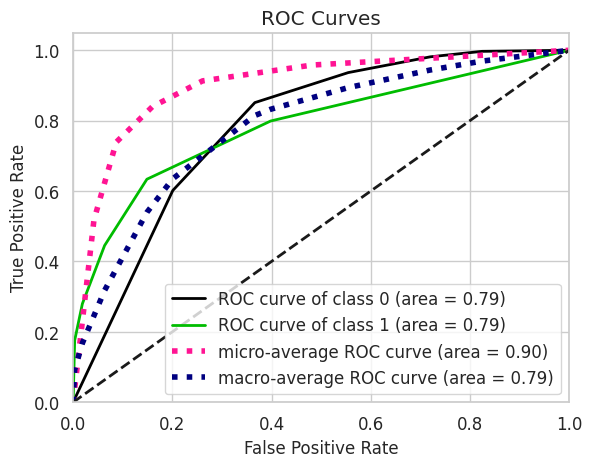

In [ ]:
import scikitplot as skplt # import the scikitplot library and alias it as 'skplt'

skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

**Decision Tree**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.943941,0.412961,0.735,0.678451,0.839603
recall,0.712508,0.826972,0.735,0.769740,0.735000
f1-score,0.812057,0.550847,0.735,0.681452,0.760729
support,1607.000000,393.000000,0.735,2000.000000,2000.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


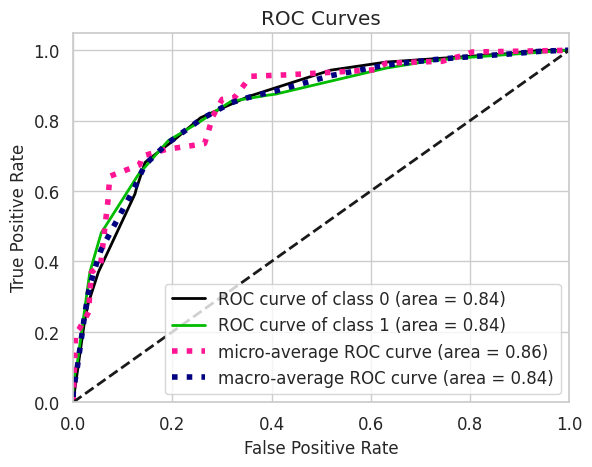

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

**Random Forest**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.882486,0.804348,0.8735,0.843417,0.867132
recall,0.971998,0.470738,0.8735,0.721368,0.873500
f1-score,0.925081,0.593900,0.8735,0.759491,0.860004
support,1607.000000,393.000000,0.8735,2000.000000,2000.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


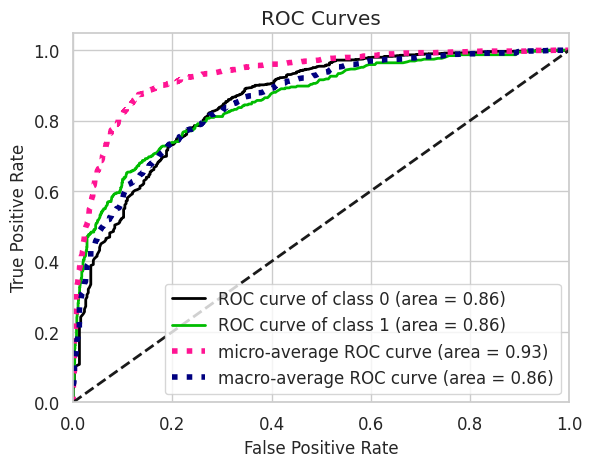

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

**SVM RBF**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.933039,0.471139,0.785,0.702089,0.842276
recall,0.789048,0.768448,0.785,0.778748,0.785000
f1-score,0.855024,0.584139,0.785,0.719581,0.801795
support,1607.000000,393.000000,0.785,2000.000000,2000.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


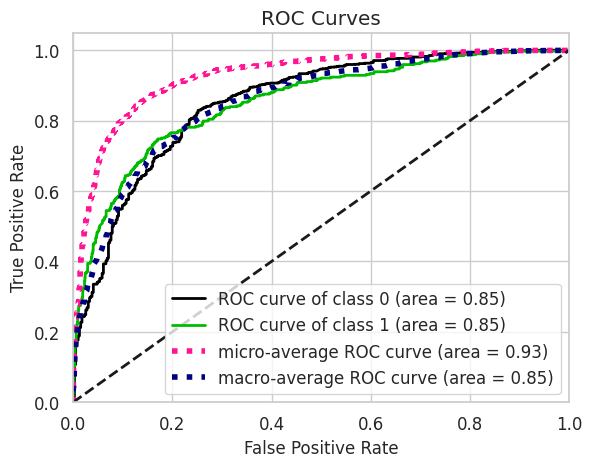

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

**XGBoost**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.896024,0.610959,0.844,0.753492,0.840009
recall,0.911637,0.567430,0.844,0.739533,0.844000
f1-score,0.903763,0.588391,0.844,0.746077,0.841792
support,1607.000000,393.000000,0.844,2000.000000,2000.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


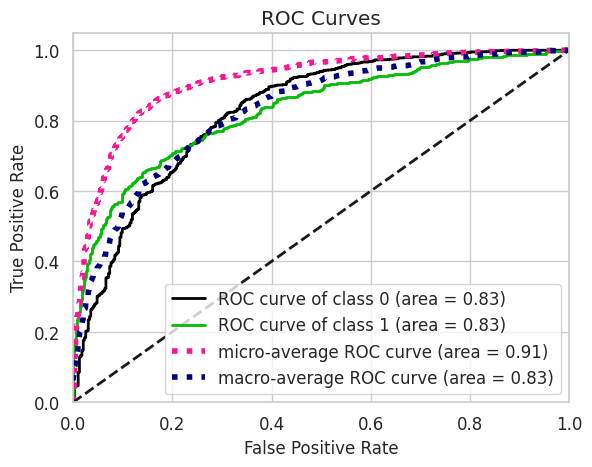

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

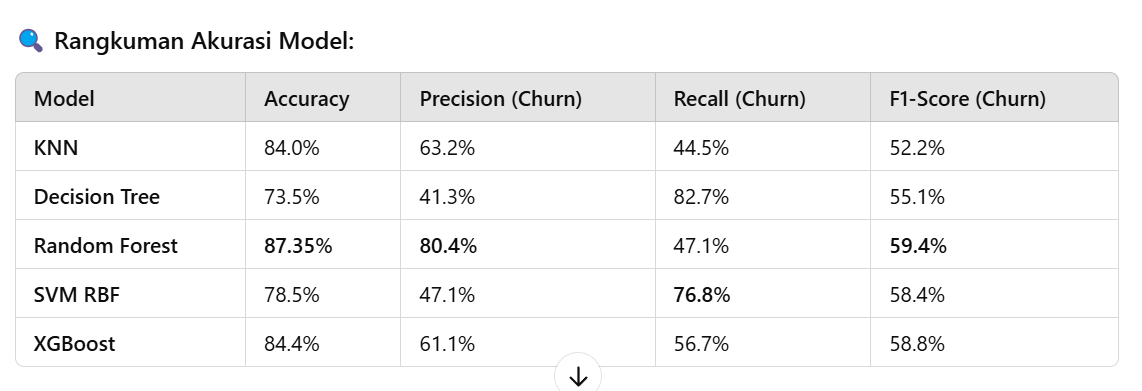

Kesimpulan Awal:

- Random Forest memiliki akurasi tertinggi (87.35%) dan precision tertinggi untuk churn (80.4%), tetapi recall churn masih rendah (47.1%).
- SVM RBF memiliki recall churn tertinggi (76.8%), tetapi precision rendah (47.1%).
- XGBoost seimbang antara precision dan recall (61.1% dan 56.7%), tetapi masih bisa dioptimalkan.

**Hyperparameter Tuning untuk Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisikan model
rf_clf = RandomForestClassifier(random_state=1000, class_weight="balanced")

# Definisikan grid hyperparameter
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Lakukan Grid Search dengan Cross-Validation
grid_search_rf = GridSearchCV(
    rf_clf, param_grid_rf,
    cv=5, scoring='roc_auc',
    n_jobs=-1, verbose=1
)

# Fit model ke data
grid_search_rf.fit(X_train, y_train)

# Lihat parameter terbaik
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluasi model terbaik
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Lihat metrik evaluasi
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_rf))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.57      0.69      0.62       393

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.84      2000

AUC-ROC Score: 0.8639238952990336


**Hyperparameter Tuning untuk XGBoosta**

In [ ]:
from xgboost import XGBClassifier

# Definisikan model
xgb_clf = XGBClassifier(random_state=1000, use_label_encoder=False, eval_metric='logloss')

# Definisikan grid hyperparameter
param_grid_xgb = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Lakukan Grid Search dengan Cross-Validation
grid_search_xgb = GridSearchCV(
    xgb_clf, param_grid_xgb,
    cv=5, scoring='roc_auc',
    n_jobs=-1, verbose=1
)

# Fit model ke data
grid_search_xgb.fit(X_train, y_train)

# Lihat parameter terbaik
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluasi model terbaik
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Lihat metrik evaluasi
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_xgb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

AUC-ROC Score: 0.8719952941250984


# Kesimpulan Akhir: Model Mana yang Terbaik?

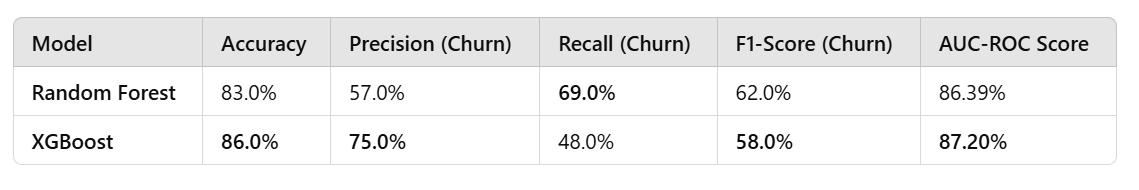

**Analisis Model**

1. Evaluasi Akurasi dan AUC-ROC
- XGBoost memiliki akurasi lebih tinggi (86%) dibandingkan Random Forest (83%), yang berarti model ini lebih baik dalam mengklasifikasikan pelanggan dengan benar.
- AUC-ROC XGBoost (87.20%) juga lebih tinggi dibandingkan Random Forest (86.39%), menunjukkan bahwa XGBoost memiliki kemampuan lebih baik dalam membedakan pelanggan churn dan non-churn.
Kesimpulan: Dari segi akurasi dan AUC-ROC, XGBoost lebih unggul, karena lebih stabil dalam membedakan kelas churn dan non-churn.

2. Precision dan Recall (Churn)
- Precision churn Random Forest (57%) lebih rendah dari XGBoost (75%), berarti model Random Forest lebih sering salah memprediksi pelanggan yang churn.
Recall churn Random Forest (69%) lebih tinggi dibandingkan XGBoost (48%), menunjukkan bahwa Random Forest lebih baik dalam menangkap pelanggan yang benar-benar churn.

Kesimpulan:

- Jika bisnis lebih mementingkan recall (misalnya ingin menangkap semua pelanggan yang berpotensi churn agar bisa diberi penawaran retention), maka Random Forest lebih baik.
- Jika bisnis lebih mementingkan precision (misalnya ingin meminimalkan kesalahan dalam memberikan promo retention hanya kepada pelanggan yang benar-benar churn), maka XGBoost lebih baik.

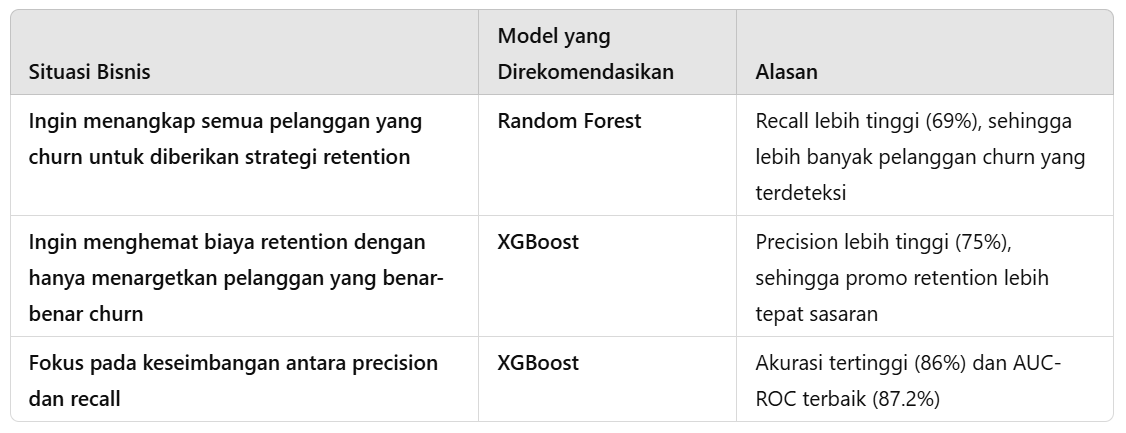

**Strategi Bisnis:**

- Gunakan XGBoost untuk memilih pelanggan yang paling mungkin churn dengan kepastian tinggi.
- Alihkan sumber daya retention ke pelanggan yang benar-benar berisiko churn, sehingga biaya retention lebih efisien.
- Gunakan strategi penawaran eksklusif hanya untuk pelanggan yang benar-benar akan churn, tanpa perlu mengeluarkan biaya promosi untuk pelanggan yang masih loyal.